In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import locally saved csv
avocado = pd.read_csv('/Users/admin/Documents/Kira/DataScience/data/avocado.csv')

# Context

It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.

Clearly, they aren't buying home because they are buying too much Avocado Toast!

But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

# Data description
This data was downloaded from the Hass Avocado Board website in May of 2018.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Source: https://www.kaggle.com/neuromusic/avocado-prices

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- PLU = price look-up code, international labelling for fruits for a simplified scanning process at the check-out
- 4046 - Total number of avocados with PLU 4046 sold, so called "CA avocado" (small avocado)
- 4225 - Total number of avocados with PLU 4225 sold, so called "CA avocado" (medium avocado)
- 4770 - Total number of avocados with PLU 4770 sold, so called "CA avocado" (large avocado)

# Data cleaning

In [3]:
avocado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [4]:
avocado['Date'] = pd.to_datetime(avocado['Date'])

# Data investigation

In [5]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Investigating columns

### Average Price

array([[<AxesSubplot:title={'center':'AveragePrice'}>]], dtype=object)

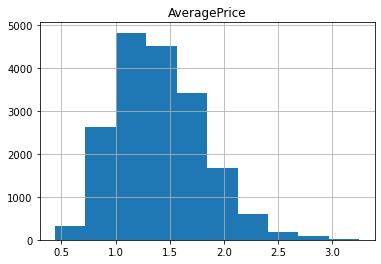

In [6]:
avocado.hist('AveragePrice')

The price (probably in $) is between 0.4 and 3.3 with the main part between 0.75 and 2.1.

### Region TODO

In [7]:
avocado['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [8]:
avocado['region'].nunique()

54

Result
All cities (n=54) except for WestTexNewMexico have delivered 338 values.
Now investigating what's up in WestTexNewMexico

In [9]:
# selecting the region and plotting the average price over time. where a drop appears, there should be the missing values.
WestTexNewMexico = avocado[avocado['region'] == 'WestTexNewMexico']

In [10]:
WestTexNewMexico

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2756,0,2015-12-27,0.71,776404.39,451904.51,141599.36,15486.97,167413.55,123158.22,33065.33,11190.00,conventional,2015,WestTexNewMexico
2757,1,2015-12-20,0.83,649885.76,389110.55,108176.29,12953.59,139645.33,90392.86,23535.80,25716.67,conventional,2015,WestTexNewMexico
2758,2,2015-12-13,0.78,646041.56,437780.91,100110.13,13576.25,94574.27,83053.10,10947.84,573.33,conventional,2015,WestTexNewMexico
2759,3,2015-12-06,0.74,623231.77,398871.12,133434.18,21088.12,69838.35,68233.56,1604.79,0.00,conventional,2015,WestTexNewMexico
2760,4,2015-11-29,0.81,519028.45,335446.83,103635.94,11463.06,68482.62,67264.73,1217.89,0.00,conventional,2015,WestTexNewMexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,2018,WestTexNewMexico


<AxesSubplot:xlabel='AveragePrice', ylabel='Date'>

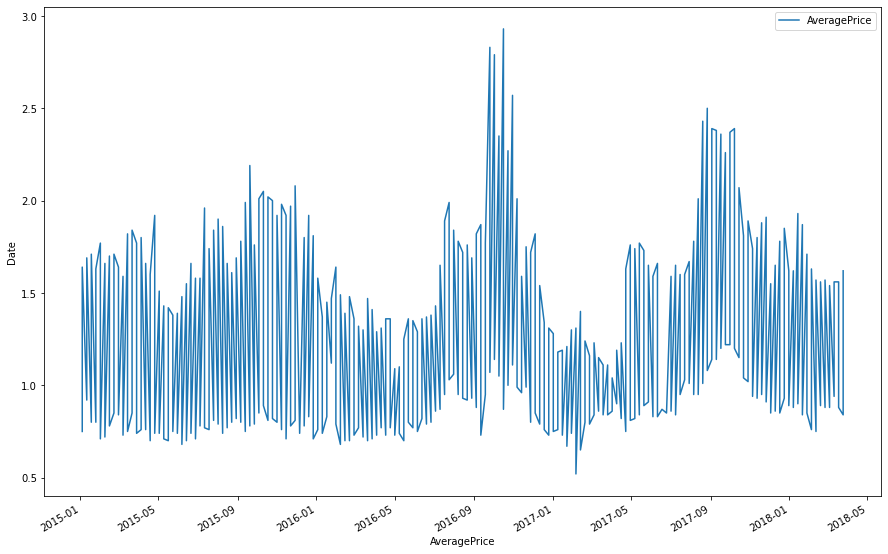

In [11]:
WestTexNewMexico.plot(x='Date', y='AveragePrice', xlabel ='AveragePrice', ylabel='Date',figsize=(15, 10))

<AxesSubplot:xlabel='AveragePrice', ylabel='Date'>

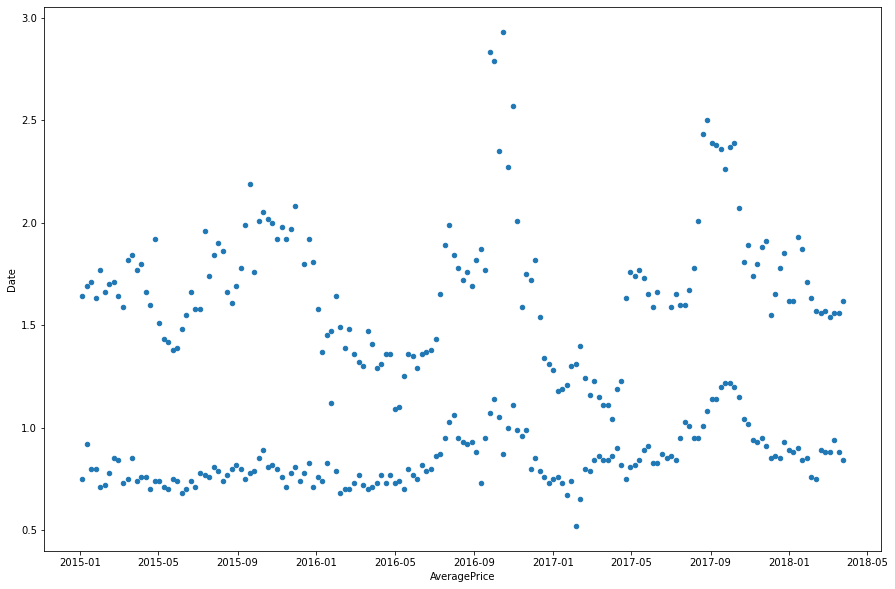

In [12]:
# trying a dot plot
WestTexNewMexico.plot.scatter(x='Date', y='AveragePrice', xlabel ='AveragePrice', ylabel='Date',figsize=(15, 10))

**TODO New solution?**

### Type

In [13]:
avocado['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

There are 3 less values provided for organic avocados

### Date

In [14]:
avocado['Date']

0       2015-12-27
1       2015-12-20
2       2015-12-13
3       2015-12-06
4       2015-11-29
           ...    
18244   2018-02-04
18245   2018-01-28
18246   2018-01-21
18247   2018-01-14
18248   2018-01-07
Name: Date, Length: 18249, dtype: datetime64[ns]

The dates are apparently not ordered completely ascending or descending within the dataframe. The structure is ascending regarding the year and descending regarding the day within a year.

In [15]:
avocado['Date'].value_counts()

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64

Are there only two numbers of submissions for the days?

In [16]:
submissions_per_day = avocado['Date'].value_counts()
submissions_per_day.nunique()

2

<AxesSubplot:>

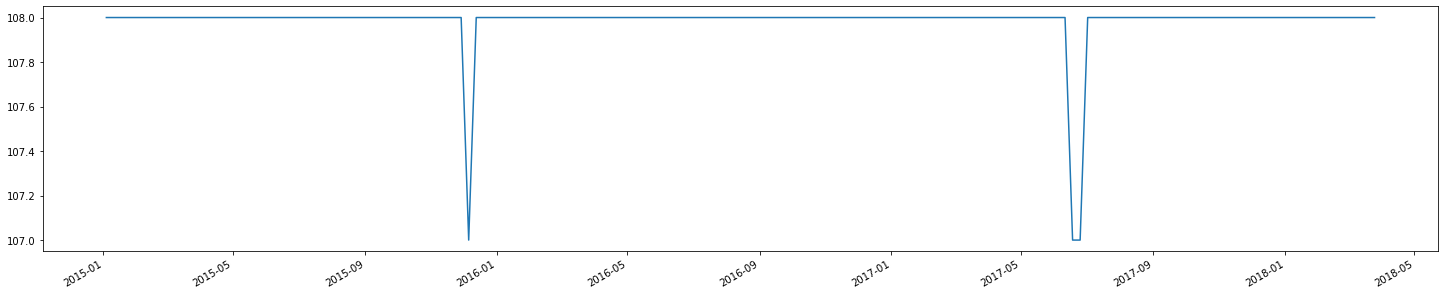

In [17]:
# visual check
submissions_per_day.plot(figsize=(25,5))

Seems that there are mostly 108 values received for the days but for certain days only 107 (n = 3). Better make sure. 

In [18]:
# creating a data frame out of the list "submissions per day"
df_107_per_day = pd.DataFrame(submissions_per_day)
df_107_per_day

,Date
2015-12-27,108
2017-12-24,108
2017-12-10,108
2017-12-03,108
2017-11-26,108
...,...
2016-11-06,108
2018-01-07,108
2017-06-18,107
2017-06-25,107


In [19]:
# selecting the rows of interest within this data frame
result_df_107_per_day = df_107_per_day[df_107_per_day['Date'] < 108]
result_df_107_per_day

,Date
2017-06-18,107
2017-06-25,107
2015-12-06,107


For these dates, one value less had been submitted. 

### Unnamed: 0

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>]], dtype=object)

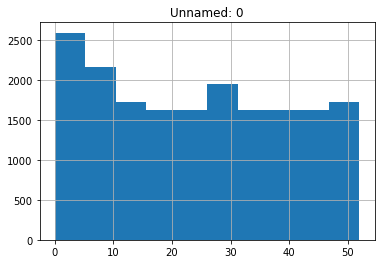

In [20]:
avocado.hist('Unnamed: 0')

Investigating the logical structure of Unnamed: 0, because this is obviously not a straightly iterating index. Start with having a look at one region separately

In [21]:
connection_unnamed_region = avocado[avocado['region'] == 'Albany']

In [22]:
connection_unnamed_region[:30]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


In [23]:
connection_unnamed_region.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
17608,7,2018-02-04,1.52,4124.96,118.38,420.36,0.0,3586.22,3586.22,0.00,0.0,organic,2018,Albany
17609,8,2018-01-28,1.32,6987.56,433.66,374.96,0.0,6178.94,6178.94,0.00,0.0,organic,2018,Albany
17610,9,2018-01-21,1.54,3346.54,14.67,253.01,0.0,3078.86,3078.86,0.00,0.0,organic,2018,Albany
17611,10,2018-01-14,1.47,4140.95,7.30,301.87,0.0,3831.78,3831.78,0.00,0.0,organic,2018,Albany
17612,11,2018-01-07,1.54,4816.90,43.51,412.17,0.0,4361.22,4357.89,3.33,0.0,organic,2018,Albany


Based on the .tail() view, this "index" appears multiple times per region. Search for commonalities between columns of the same "index"

In [24]:
connection_unnamed_value1 = avocado[avocado['Unnamed: 0'] == 1]
connection_unnamed_value1[40:70]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2081,1,2015-12-20,1.00,385518.03,99604.61,224843.47,15917.28,45152.67,45138.23,8.66,5.78,conventional,2015,Sacramento
2133,1,2015-12-20,0.94,420476.44,130565.46,119298.50,25052.93,145559.55,111019.22,34540.33,0.00,conventional,2015,SanDiego
2185,1,2015-12-20,1.15,637091.48,173521.67,364622.31,33083.99,65863.51,65038.10,766.09,59.32,conventional,2015,SanFrancisco
2237,1,2015-12-20,1.15,404862.32,88134.20,139794.19,6308.35,170625.58,170458.45,11.87,155.26,conventional,2015,Seattle
2289,1,2015-12-20,1.04,211066.05,115402.34,39931.51,6244.22,49487.98,44628.73,4851.44,7.81,conventional,2015,SouthCarolina
2341,1,2015-12-20,0.81,4565207.85,2166801.03,1226508.86,412828.75,759069.21,555356.92,95639.50,108072.79,conventional,2015,SouthCentral
2393,1,2015-12-20,1.12,2206305.07,1449139.49,211595.53,10520.40,535049.65,399343.68,135633.67,72.30,conventional,2015,Southeast
2445,1,2015-12-20,1.12,61555.62,17819.26,16576.75,2660.37,24499.24,24499.24,0.00,0.00,conventional,2015,Spokane
2497,1,2015-12-20,1.13,135427.66,40333.06,23867.60,40.52,71186.48,59160.36,12026.12,0.00,conventional,2015,StLouis
2549,1,2015-12-20,1.36,39365.15,646.68,22231.33,12.89,16474.25,16474.25,0.00,0.00,conventional,2015,Syracuse


Seems that for each region there is one submission with the "index" 1. Investigating the unique numbers upon unnamed-based grouping

In [25]:
avocado.groupby('Unnamed: 0').nunique()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,,,,,,,,,,,,,
0,4,133,432,429,432,296,432,431,394,167,2,4,54
1,4,128,432,428,431,302,432,432,392,173,2,4,54
2,4,138,432,429,432,302,432,431,387,157,2,4,54
3,5,145,432,427,432,298,432,431,376,162,2,4,54
4,5,135,432,428,430,292,432,430,382,153,2,4,54
5,5,133,432,428,431,299,432,430,381,146,2,4,54
6,5,146,432,426,431,301,432,430,384,144,2,4,54
7,5,146,432,429,432,294,432,432,385,147,2,4,54
8,5,149,432,428,431,297,432,428,380,153,2,4,54


Check hypothesis: Based on the 4 unique values for year and date and 54 unique values for regions, it could be that the index is iterating and reset to 0 for each year. 

In [26]:
# creating a new data frame to select only rows where unnamed equals 1
df_unnamed_value1 = pd.DataFrame(connection_unnamed_value1)
df_unnamed_value1

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
53,1,2015-12-20,1.08,331377.53,251774.15,20702.45,103.06,58797.87,46930.26,11867.61,0.00,conventional,2015,Atlanta
105,1,2015-12-20,1.11,642682.40,44741.37,434590.82,19112.14,144238.07,141751.91,2486.16,0.00,conventional,2015,BaltimoreWashington
157,1,2015-12-20,1.03,57504.05,25628.22,2546.09,7393.84,21935.90,21900.35,11.43,24.12,conventional,2015,Boise
209,1,2015-12-20,1.07,489802.88,4912.37,390100.99,5887.72,88901.80,88768.47,133.33,0.00,conventional,2015,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18190,1,2018-03-18,1.19,6981.22,162.32,87.87,0.00,6731.03,2782.91,3948.12,0.00,organic,2018,Syracuse
18202,1,2018-03-18,1.50,10311.24,190.28,901.77,0.00,9219.19,7687.03,1532.16,0.00,organic,2018,Tampa
18214,1,2018-03-18,1.54,1675804.22,170801.85,444949.69,1045.38,1058651.50,837351.85,221129.46,170.19,organic,2018,TotalUS
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West


In [27]:
# selecting the rows for Albany from the dataframe df_unnamed_value1
result_df_unnamed_value1 = df_unnamed_value1[df_unnamed_value1['region']=='Albany']
result_df_unnamed_value1

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2809,1,2016-12-18,1.53,68938.53,3345.36,55949.79,138.72,9504.66,8876.65,587.73,40.28,conventional,2016,Albany
5617,1,2017-12-24,1.45,77039.09,2811.71,58592.23,19.06,15616.09,6863.18,8752.91,0.00,conventional,2017,Albany
8479,1,2018-03-18,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.00,conventional,2018,Albany
9127,1,2015-12-20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.00,organic,2015,Albany
11934,1,2016-12-18,1.86,1472.84,111.34,198.07,0.00,1163.43,1163.43,0.00,0.00,organic,2016,Albany
14742,1,2017-12-24,1.58,3694.13,31.68,327.39,0.00,3335.06,3335.06,0.00,0.00,organic,2017,Albany
17602,1,2018-03-18,1.66,3154.45,275.89,297.96,0.00,2580.60,2577.27,3.33,0.00,organic,2018,Albany


This prooves the hypothesis: Each "index" number represents the first (or last) submission from one region for one type per year. We also see here that on each submission day, both the values for conventional and organic avocados are submitted. This explains also why for each date twice the number of cities is submitted. Each city submits two values.  

## Total Volume

In [28]:
# open questions
# 1) Values for which time of WestTexNewMexico are missing? 
# 2) Are the dates with missing values the ones from WestTextNewMexico?
# 5) What kind of value is Total Volume?

In [29]:
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


<AxesSubplot:xlabel='Date', ylabel='Total Volume'>

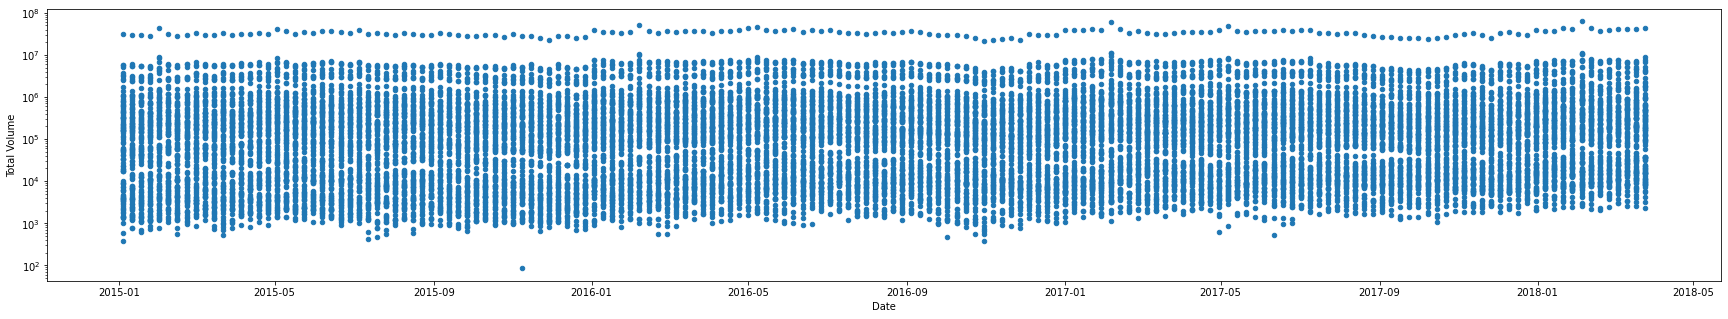

In [30]:
avocado.plot.scatter(x='Date', y='Total Volume', figsize=(30,5),logy=True)

What kind of value is Total Volume? A revenue or a count?

In [31]:
TotalVolume_is_number = (1036.74 + 54454.85 + 48.16)

In [32]:
TotalVolume_is_number

55539.75

In [33]:
TotalVolume_is_revenue = (1036.74 + 54454.85 + 48.16)*1.33

In [34]:
TotalVolume_is_revenue

73867.86750000001

Neither adding up sales units for all three types nor the additional multiplication with the price is anywhere close to the value "TotalVolume". Instead of a number, it could of course also be a weight, but this does also not add up. The only possible explanation is that there are non-categorized avocado sales or special avocads of other PLUs.

In [35]:
# In the graph, very high numbers of total volume are displayed. Check for max and min values.
avocado['Total Volume'].max()

62505646.52

In [36]:
avocado['Total Volume'].min()

84.56

# Investigation of missing values

The previous investigation of columns revealed that
- 3 values for WestTexNewMexico
- 3 dates 	Date
(2015-12-06 / 2017-06-25 / 2017-06-18)
- 3 values for organic avocados
are missing. Investigating the missing values. 

In [37]:
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [38]:
WestTexNewMexico = avocado[avocado['region'] == 'WestTexNewMexico']

In [39]:
WTNM_organic = WestTexNewMexico[WestTexNewMexico['type'] == 'organic']

In [40]:
WTNM_organic

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11882,0,2015-12-27,1.81,7155.63,1478.79,2629.64,14.10,3033.10,2855.55,177.55,0.0,organic,2015,WestTexNewMexico
11883,1,2015-12-20,1.92,6255.19,1512.45,2407.32,11.78,2323.64,2213.72,109.92,0.0,organic,2015,WestTexNewMexico
11884,2,2015-12-13,1.80,7836.65,2194.49,2981.01,25.97,2635.18,2598.45,36.73,0.0,organic,2015,WestTexNewMexico
11885,3,2015-11-29,2.08,4638.10,1395.02,2238.04,61.71,943.33,943.33,0.00,0.0,organic,2015,WestTexNewMexico
11886,4,2015-11-22,1.97,6249.43,1733.40,2873.92,30.95,1611.16,1590.00,21.16,0.0,organic,2015,WestTexNewMexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [41]:
a = WTNM_organic[WTNM_organic['Date'] == '2015-12-06' ]
a

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [42]:
b = WTNM_organic[WTNM_organic['Date'] == '2017-06-25' ]
b

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [43]:
c = WTNM_organic[WTNM_organic['Date'] == '2017-06-18' ]
c

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


There are no values for organic avocodas submitted by WestTexnewMexico for the missing dates. 